In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
import math

plt.rc('font', family='AppleGothic')

### 01) 데이터 전처리

In [2]:
final_df = pd.read_csv('../data/SEOUL_CLASS_1.csv')
final_df

,상권_코드_명,기준_년_코드,기준_분기_코드,업종_대분류,경영_위기_비율,상권_코드,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,...,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,유사_업종_점포_수,개업률,폐업률
0,DMC(디지털미디어시티),2022,1,외식업,0.150943,2120098,72,24,1285,8846.0,...,20.60,62.10,17.60,87.80,12.40,57.50,42.50,421,4.08,2.04
1,DMC(디지털미디어시티),2022,2,외식업,0.207547,2120098,72,24,1285,8846.0,...,21.00,60.80,18.70,86.40,13.60,56.40,43.80,424,6.08,4.39
2,DMC(디지털미디어시티),2022,3,외식업,0.142857,2120098,72,24,1285,8846.0,...,21.00,61.00,18.00,85.80,14.40,56.40,43.70,426,5.00,4.67
3,DMC(디지털미디어시티),2022,4,외식업,0.291667,2120098,72,24,1285,8846.0,...,20.70,60.40,18.80,83.00,17.00,56.80,43.20,427,6.98,6.64
4,가락시장역,2022,1,외식업,0.235294,2120234,62,3,2694,10268.0,...,15.27,49.73,35.09,77.82,22.27,61.82,38.18,294,2.74,4.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,홍대입구역(홍대),2022,4,유통업,0.387755,2120103,91,22,4789,9580.0,...,38.74,30.11,31.68,71.47,28.63,43.63,56.37,874,3.14,1.93
664,화곡역,2022,1,서비스업,0.166667,2120120,88,16,2748,927.0,...,21.94,48.25,30.00,81.12,18.94,49.19,50.94,254,1.22,3.27
665,화곡역,2022,2,서비스업,0.473684,2120120,88,16,2748,927.0,...,19.60,46.00,34.33,81.27,18.93,54.93,45.13,258,3.23,1.61
666,화곡역,2022,3,서비스업,0.380952,2120120,88,16,2748,927.0,...,18.20,43.60,38.27,81.40,18.67,52.40,47.87,256,1.21,2.02


In [3]:
final_df.drop(['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명'], axis=1, inplace=True)
final_df

,업종_대분류,경영_위기_비율,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,월_평균_소득_금액,클러스터,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,유사_업종_점포_수,개업률,폐업률
0,외식업,0.150943,72,24,1285,8846.0,318202,3567709.0,3,20.60,62.10,17.60,87.80,12.40,57.50,42.50,421,4.08,2.04
1,외식업,0.207547,72,24,1285,8846.0,358782,3567709.0,3,21.00,60.80,18.70,86.40,13.60,56.40,43.80,424,6.08,4.39
2,외식업,0.142857,72,24,1285,8846.0,352688,3567709.0,3,21.00,61.00,18.00,85.80,14.40,56.40,43.70,426,5.00,4.67
3,외식업,0.291667,72,24,1285,8846.0,355095,3567709.0,3,20.70,60.40,18.80,83.00,17.00,56.80,43.20,427,6.98,6.64
4,외식업,0.235294,62,3,2694,10268.0,1430185,3494644.0,1,15.27,49.73,35.09,77.82,22.27,61.82,38.18,294,2.74,4.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,유통업,0.387755,91,22,4789,9580.0,3897068,2934520.0,0,38.74,30.11,31.68,71.47,28.63,43.63,56.37,874,3.14,1.93
664,서비스업,0.166667,88,16,2748,927.0,1102013,2624496.0,1,21.94,48.25,30.00,81.12,18.94,49.19,50.94,254,1.22,3.27
665,서비스업,0.473684,88,16,2748,927.0,1168431,2624496.0,1,19.60,46.00,34.33,81.27,18.93,54.93,45.13,258,3.23,1.61
666,서비스업,0.380952,88,16,2748,927.0,1163547,2624496.0,1,18.20,43.60,38.27,81.40,18.67,52.40,47.87,256,1.21,2.02


In [4]:
cluster0_df = final_df[final_df['클러스터'] == 0].copy()
cluster1_df = final_df[final_df['클러스터'] == 1].copy()
cluster2_df = final_df[final_df['클러스터'] == 2].copy()
cluster3_df = final_df[final_df['클러스터'] == 3].copy()

In [5]:
cluster0_df.drop('클러스터', axis=1, inplace=True)
cluster1_df.drop('클러스터', axis=1, inplace=True)
cluster2_df.drop('클러스터', axis=1, inplace=True)
cluster3_df.drop('클러스터', axis=1, inplace=True)

### 02) 모델 학습 - regression

#### 전체

##### 클러스터 0

In [45]:
credit_cluster0_df.columns

Index(['class_1_name', 'average(age)', 'average(duration)',
       'average(is_franchise)', 'average(business_square_size)',
       'average(is_risky)', 'average(monthly_rental_fee)',
       'average(regular_employees_count)', 'average(rental_deposit)',
       'average(sum_customer_cnt)', 'average(sum_new_customer_cnt)',
       'average(sum_purchase_card)', 'average(sum_purchase_cash)',
       'average(sum_purchase_invoice)', 'average(sum_sales_card)',
       'average(sum_sales_delivery)', 'average(sum_sales_invoice)',
       'average(sum_weekend_sales_card)',
       'average(sum_weekend_sales_delivery)'],
      dtype='object')

In [46]:
x5 = credit_cluster0_df.drop(['average(is_risky)', 'class_1_name'], axis=1)
y5 = credit_cluster0_df['average(is_risky)']
x5_train, x5_valid, y5_train, y5_valid= train_test_split(x5, y5, test_size=0.2, random_state=0)

In [47]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4 ,6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10, 12),
    'min_samples_split' : (4, 6, 8, 10, 12)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_cv.fit(x5_train, y5_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 100}
최적 MSE: 0.0071


In [48]:
rf = RandomForestRegressor(random_state=0, max_depth=4, min_samples_leaf=4, min_samples_split=12, n_estimators=100)
rf.fit(x5_train, y5_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=4, min_samples_split=12,
                      random_state=0)

In [49]:
# train rmse
train_predict = rf.predict(x5_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y5_train))))

# valid rmse
valid_predict = rf.predict(x5_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y5_valid))))

RMSE:0.05890423554153537
RMSE:0.08286431404439439


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


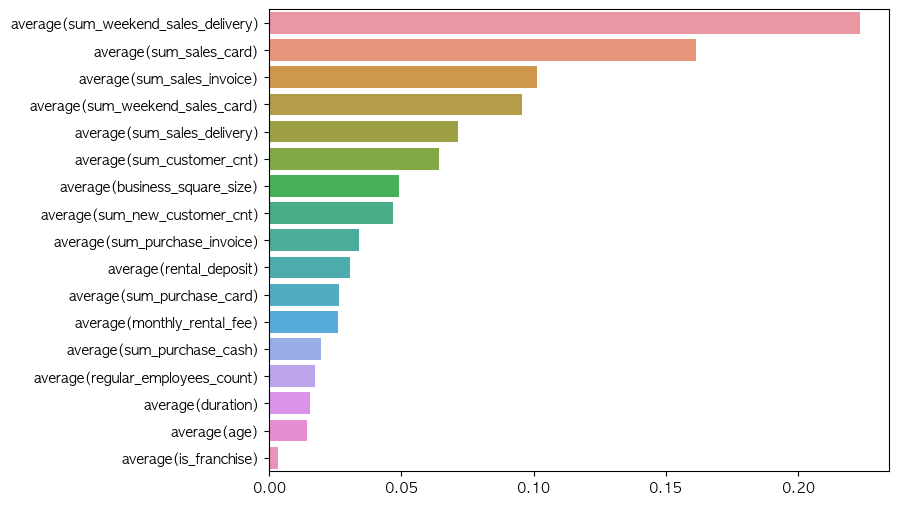

In [50]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x5_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [51]:
ftr_top

average(sum_weekend_sales_delivery)    0.223216
average(sum_sales_card)                0.161325
average(sum_sales_invoice)             0.101256
average(sum_weekend_sales_card)        0.095595
average(sum_sales_delivery)            0.071428
average(sum_customer_cnt)              0.064346
average(business_square_size)          0.049118
average(sum_new_customer_cnt)          0.046927
average(sum_purchase_invoice)          0.033763
average(rental_deposit)                0.030659
average(sum_purchase_card)             0.026361
average(monthly_rental_fee)            0.025974
average(sum_purchase_cash)             0.019460
average(regular_employees_count)       0.017387
average(duration)                      0.015444
average(age)                           0.014280
average(is_franchise)                  0.003461
dtype: float64

##### 클러스터 1

In [34]:
x5 = cluster1_df.drop(['경영_위기_비율', '업종_대분류'], axis=1)
y5 = cluster1_df['경영_위기_비율']
x5_train, x5_valid, y5_train, y5_valid= train_test_split(x5, y5, test_size=0.2, random_state=0)

In [35]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4 ,6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10, 12),
    'min_samples_split' : (4, 6, 8, 10, 12)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_cv.fit(x5_train, y5_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 100}
최적 MSE: 0.0102


In [36]:
rf = RandomForestRegressor(random_state=0, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=100)
rf.fit(x5_train, y5_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=6, min_samples_split=6,
                      random_state=0)

In [37]:
# train rmse
train_predict = rf.predict(x5_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y5_train))))

# valid rmse
valid_predict = rf.predict(x5_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y5_valid))))

RMSE:0.07056995042654128
RMSE:0.09712941447979569


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


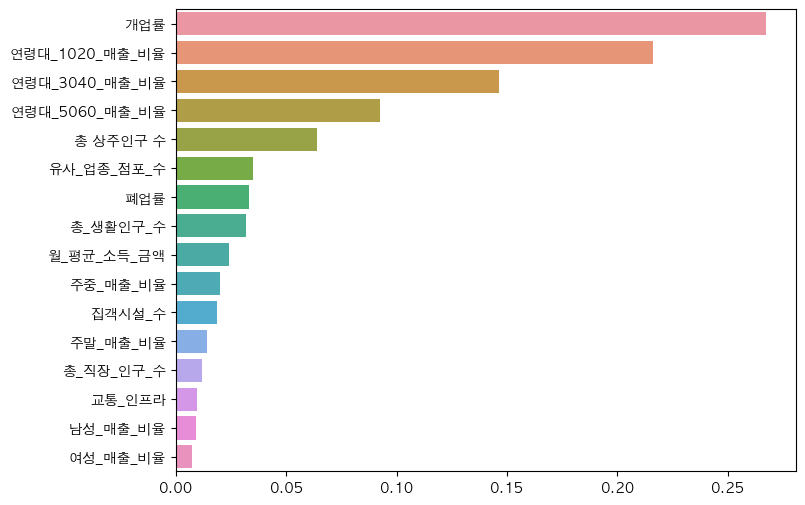

In [38]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x5_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [39]:
ftr_top

개업률               0.267431
연령대_1020_매출_비율    0.216015
연령대_3040_매출_비율    0.146373
연령대_5060_매출_비율    0.092256
총 상주인구 수          0.063823
유사_업종_점포_수        0.035016
폐업률               0.033168
총_생활인구_수          0.031592
월_평균_소득_금액        0.023937
주중_매출_비율          0.019800
집객시설_수            0.018465
주말_매출_비율          0.014009
총_직장_인구_수         0.012020
교통_인프라            0.009580
남성_매출_비율          0.009108
여성_매출_비율          0.007407
dtype: float64

#### cluster 1

##### 외식업

In [23]:
x2 = cluster1_df[cluster1_df['업종_대분류'] == '외식업'].drop(['경영_위기_비율', '업종_대분류'], axis=1)
y2 = cluster1_df[cluster1_df['업종_대분류'] == '외식업']['경영_위기_비율']
x2_train, x2_valid, y2_train, y2_valid= train_test_split(x2, y2, test_size=0.2, random_state=0)

In [25]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4 ,6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10, 12),
    'min_samples_split' : (4, 6, 8, 10, 12)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_cv.fit(x2_train, y2_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
최적 MSE: 0.0071


In [60]:
rf = RandomForestRegressor(random_state=0, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100)
rf.fit(x2_train, y2_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=4,
                      random_state=0)

In [61]:
# train rmse
train_predict = rf.predict(x2_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y2_train))))

# valid rmse
valid_predict = rf.predict(x2_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y2_valid))))

RMSE:0.05108822212002593
RMSE:0.10125525135085527


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


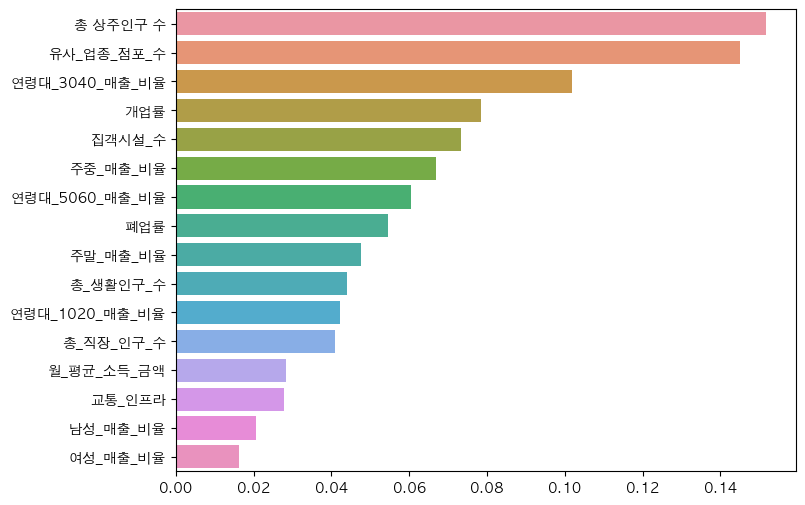

In [62]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x2_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [29]:
ftr_top

총 상주인구 수          0.151779
유사_업종_점포_수        0.145117
연령대_3040_매출_비율    0.101702
개업률               0.078446
집객시설_수            0.073375
주중_매출_비율          0.066869
연령대_5060_매출_비율    0.060528
폐업률               0.054479
주말_매출_비율          0.047605
총_생활인구_수          0.043895
연령대_1020_매출_비율    0.042188
총_직장_인구_수         0.041026
월_평균_소득_금액        0.028213
교통_인프라            0.027814
남성_매출_비율          0.020661
여성_매출_비율          0.016303
dtype: float64

##### 서비스업 - 결과 X

In [185]:
x2 = cluster1_df[cluster1_df['업종_대분류'] == '서비스업'].drop(['경영_위기_비율', '업종_대분류'], axis=1)
y2 = cluster1_df[cluster1_df['업종_대분류'] == '서비스업']['경영_위기_비율']
x2_train, x2_valid, y2_train, y2_valid= train_test_split(x2, y2, test_size=0.2, random_state=0)

In [191]:
cluster1_df[cluster1_df['업종_대분류'] == '서비스업'].shape

(24, 18)

In [186]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4 ,6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10, 12),
    'min_samples_split' : (4, 6, 8, 10, 12)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_cv.fit(x2_train, y2_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 12, 'n_estimators': 100}
최적 MSE: 0.0123


In [187]:
rf = RandomForestRegressor(random_state=0, max_depth=4, min_samples_leaf=8, min_samples_split=12, n_estimators=100)
rf.fit(x2_train, y2_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=12,
                      random_state=0)

In [188]:
# train rmse
train_predict = rf.predict(x2_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y2_train))))

# valid rmse
valid_predict = rf.predict(x2_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y2_valid))))

RMSE:0.1019451953615721
RMSE:0.10299668148982166


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/p-012/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


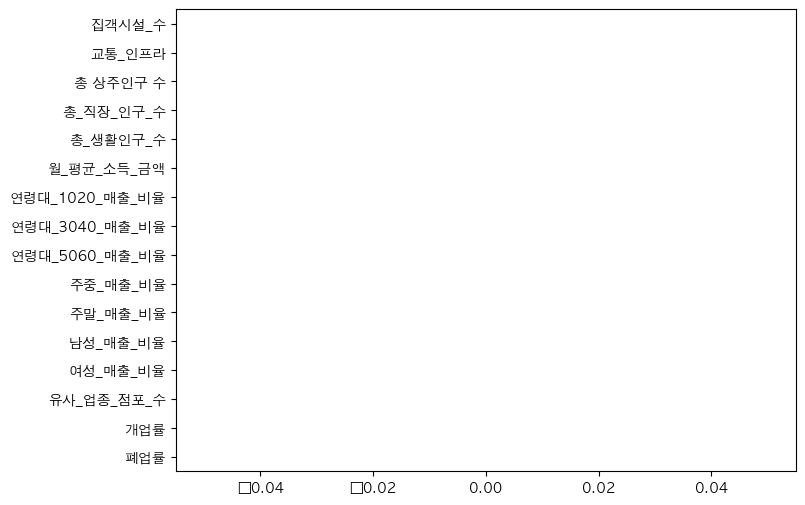

In [189]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x2_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [105]:
ftr_top

집객시설_수            0.0
교통_인프라            0.0
총 상주인구 수          0.0
총_직장_인구_수         0.0
총_생활인구_수          0.0
월_평균_소득_금액        0.0
연령대_1020_매출_비율    0.0
연령대_3040_매출_비율    0.0
연령대_5060_매출_비율    0.0
주중_매출_비율          0.0
주말_매출_비율          0.0
남성_매출_비율          0.0
여성_매출_비율          0.0
유사_업종_점포_수        0.0
개업률               0.0
폐업률               0.0
dtype: float64

##### 유통업

In [96]:
x2 = cluster1_df[cluster1_df['업종_대분류'] == '유통업'].drop(['경영_위기_비율', '업종_대분류'], axis=1)
y2 = cluster1_df[cluster1_df['업종_대분류'] == '유통업']['경영_위기_비율']
x2_train, x2_valid, y2_train, y2_valid= train_test_split(x2, y2, test_size=0.2, random_state=0)

In [83]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4 ,6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10, 12),
    'min_samples_split' : (4, 6, 8, 10, 12)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_cv.fit(x2_train, y2_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 100}
최적 MSE: 0.0094


In [97]:
rf = RandomForestRegressor(random_state=0, max_depth=4, min_samples_leaf=6, min_samples_split=10, n_estimators=100)
rf.fit(x2_train, y2_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=10,
                      random_state=0)

In [98]:
# train rmse
train_predict = rf.predict(x2_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y2_train))))

# valid rmse
valid_predict = rf.predict(x2_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y2_valid))))

RMSE:0.07349432328263585
RMSE:0.08727180330369035


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


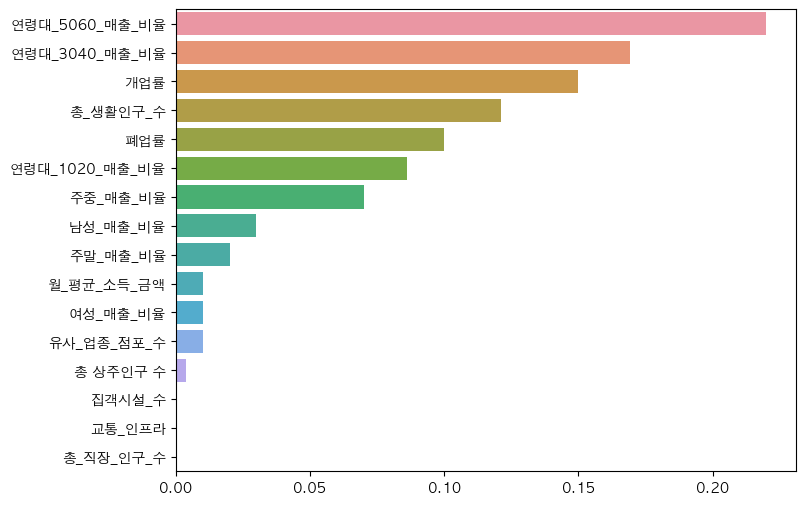

In [99]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x2_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [100]:
ftr_top

연령대_5060_매출_비율    0.220000
연령대_3040_매출_비율    0.169035
개업률               0.150000
총_생활인구_수          0.120965
폐업률               0.100000
연령대_1020_매출_비율    0.086105
주중_매출_비율          0.070000
남성_매출_비율          0.030000
주말_매출_비율          0.020000
월_평균_소득_금액        0.010000
여성_매출_비율          0.010000
유사_업종_점포_수        0.010000
총 상주인구 수          0.003895
집객시설_수            0.000000
교통_인프라            0.000000
총_직장_인구_수         0.000000
dtype: float64

#### cluster 0

##### 외식업

In [6]:
x1 = cluster0_df[cluster0_df['업종_대분류'] == '외식업'].drop(['경영_위기_비율', '업종_대분류'], axis=1)
y1 = cluster0_df[cluster0_df['업종_대분류'] == '외식업']['경영_위기_비율']
x1_train, x1_valid, y1_train, y1_valid= train_test_split(x1, y1, test_size=0.2, random_state=0)

In [59]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (8, 10, 12, 14, 16),
    'min_samples_leaf' : (4, 6, 8),
    'min_samples_split' : (10, 12, 14, 16)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=2)
grid_cv.fit(x1_train, y1_train)

 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 200}
최적 MSE: 0.0040


In [7]:
rf = RandomForestRegressor(random_state=0, max_depth=8, min_samples_leaf=4, min_samples_split=16, n_estimators=200)
rf.fit(x1_train, y1_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=16,
                      n_estimators=200, random_state=0)

In [8]:
# train rmse
train_predict = rf.predict(x1_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y1_train))))

# valid rmse
valid_predict = rf.predict(x1_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y1_valid))))

RMSE:0.04430866113141413
RMSE:0.0637280836116996


In [9]:
perm_importance = permutation_importance(rf, x1_valid, y1_valid, n_repeats=30, random_state=0)

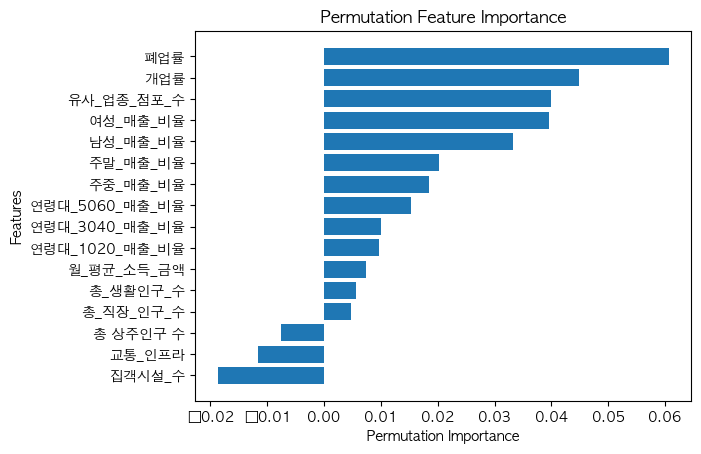

In [14]:
perm_importance = permutation_importance(rf, x1_valid, y1_valid, n_repeats=30, random_state=0)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh([str(col) for col in x1_valid.columns], perm_importance.importances_mean[sorted_idx], align='center')
plt.ylabel('Features')
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.show()

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


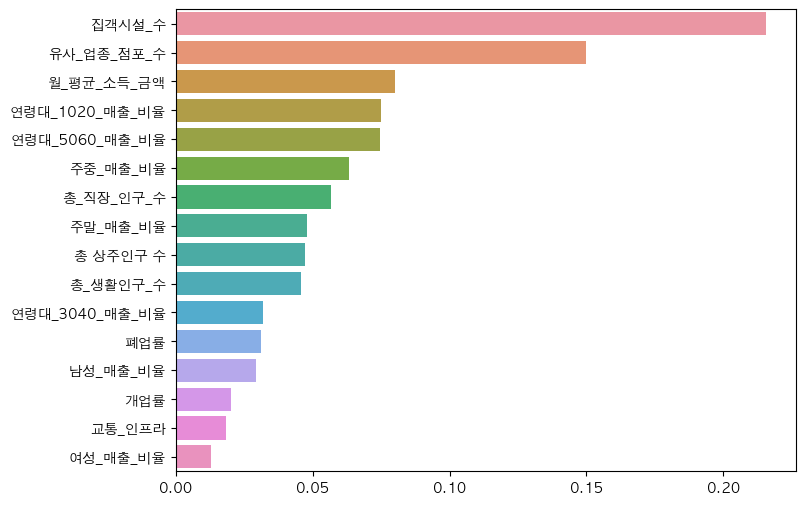

In [65]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x1_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [66]:
ftr_top

집객시설_수            0.215757
유사_업종_점포_수        0.149831
월_평균_소득_금액        0.080137
연령대_1020_매출_비율    0.074882
연령대_5060_매출_비율    0.074501
주중_매출_비율          0.063445
총_직장_인구_수         0.056741
주말_매출_비율          0.047962
총 상주인구 수          0.047212
총_생활인구_수          0.045727
연령대_3040_매출_비율    0.031872
폐업률               0.030935
남성_매출_비율          0.029409
개업률               0.020313
교통_인프라            0.018293
여성_매출_비율          0.012983
dtype: float64

##### 서비스업

In [19]:
x1 = cluster0_df[cluster0_df['업종_대분류'] == '서비스업'].drop(['경영_위기_비율', '업종_대분류'], axis=1)
y1 = cluster0_df[cluster0_df['업종_대분류'] == '서비스업']['경영_위기_비율']
x1_train, x1_valid, y1_train, y1_valid= train_test_split(x1, y1, test_size=0.2, random_state=0)

In [108]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4, 6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10),
    'min_samples_split' : (4, 6, 8, 10, 12, 14, 16)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=2)
grid_cv.fit(x1_train, y1_train)

 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}
최적 MSE: 0.0103


In [20]:
rf = RandomForestRegressor(random_state=0, max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=100)
rf.fit(x1_train, y1_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=10,
                      random_state=0)

In [21]:
# train rmse
train_predict = rf.predict(x1_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y1_train))))

# valid rmse
valid_predict = rf.predict(x1_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y1_valid))))

RMSE:0.0897122899000969
RMSE:0.11199111955879164


/Users/p-012/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


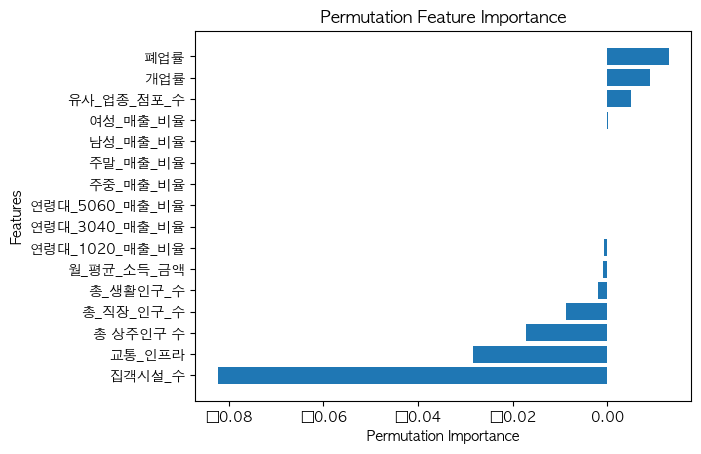

In [22]:
perm_importance = permutation_importance(rf, x1_valid, y1_valid, n_repeats=30, random_state=0)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh([str(col) for col in x1_valid.columns], perm_importance.importances_mean[sorted_idx], align='center')
plt.ylabel('Features')
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.show()

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


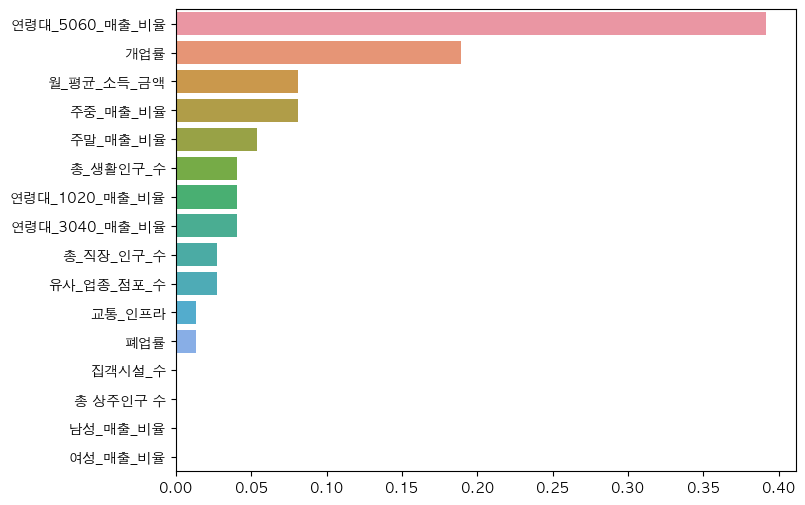

In [111]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x1_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [112]:
ftr_top

연령대_5060_매출_비율    0.391892
개업률               0.189189
월_평균_소득_금액        0.081081
주중_매출_비율          0.081081
주말_매출_비율          0.054054
총_생활인구_수          0.040541
연령대_1020_매출_비율    0.040541
연령대_3040_매출_비율    0.040541
총_직장_인구_수         0.027027
유사_업종_점포_수        0.027027
교통_인프라            0.013514
폐업률               0.013514
집객시설_수            0.000000
총 상주인구 수          0.000000
남성_매출_비율          0.000000
여성_매출_비율          0.000000
dtype: float64

##### 유통업 - 결과 X

In [119]:
x1 = cluster0_df[cluster0_df['업종_대분류'] == '유통업'].drop(['경영_위기_비율', '업종_대분류'], axis=1)
y1 = cluster0_df[cluster0_df['업종_대분류'] == '유통업']['경영_위기_비율']
x1_train, x1_valid, y1_train, y1_valid= train_test_split(x1, y1, test_size=0.2, random_state=0)

In [114]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4, 6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10),
    'min_samples_split' : (4, 6, 8, 10, 12, 14, 16)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=2)
grid_cv.fit(x1_train, y1_train)

 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 300}
최적 MSE: 0.0086


In [120]:
rf = RandomForestRegressor(random_state=0, max_depth=4, min_samples_leaf=10, min_samples_split=4, n_estimators=300)
rf.fit(x1_train, y1_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=4,
                      n_estimators=300, random_state=0)

In [121]:
# train rmse
train_predict = rf.predict(x1_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y1_train))))

# valid rmse
valid_predict = rf.predict(x1_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y1_valid))))

RMSE:0.09006679333346887
RMSE:0.11360113144573084


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/p-012/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


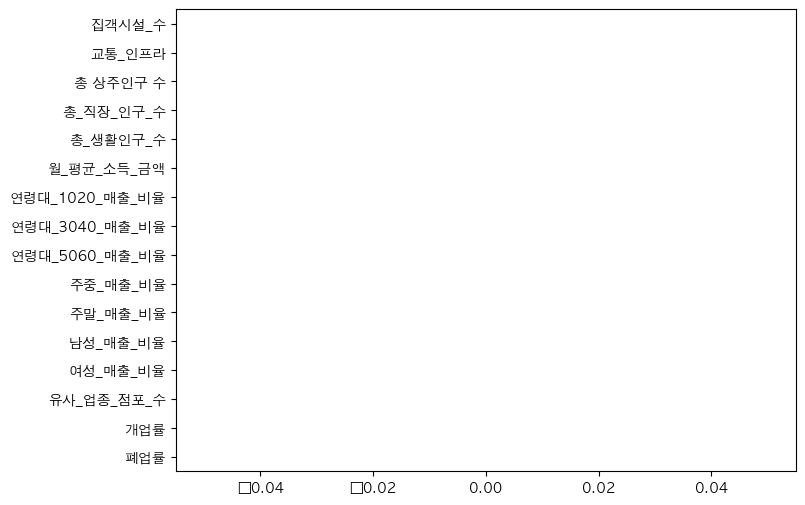

In [122]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x1_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [123]:
ftr_top

집객시설_수            0.0
교통_인프라            0.0
총 상주인구 수          0.0
총_직장_인구_수         0.0
총_생활인구_수          0.0
월_평균_소득_금액        0.0
연령대_1020_매출_비율    0.0
연령대_3040_매출_비율    0.0
연령대_5060_매출_비율    0.0
주중_매출_비율          0.0
주말_매출_비율          0.0
남성_매출_비율          0.0
여성_매출_비율          0.0
유사_업종_점포_수        0.0
개업률               0.0
폐업률               0.0
dtype: float64

#### cluster 2

##### 외식업

In [124]:
x3 = cluster2_df[cluster2_df['업종_대분류'] == '외식업'].drop(['경영_위기_비율', '업종_대분류'], axis=1)
y3 = cluster2_df[cluster2_df['업종_대분류'] == '외식업']['경영_위기_비율']
x3_train, x3_valid, y3_train, y3_valid= train_test_split(x3, y3, test_size=0.2, random_state=0)

In [171]:
cluster2_df[cluster2_df['업종_대분류'] == '외식업'].reset_index()

,index,업종_대분류,경영_위기_비율,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,월_평균_소득_금액,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,유사_업종_점포_수,개업률,폐업률
0,21,외식업,0.162921,212,85,3865,81100.0,1084018,2632542.0,22.27,54.18,23.45,89.36,10.73,59.45,40.64,1007,4.43,3.14
1,24,외식업,0.144444,212,85,3865,81100.0,1142582,2632542.0,21.82,55.55,22.82,89.18,10.82,59.45,40.64,1012,6.21,4.66
2,27,외식업,0.151832,212,85,3865,81100.0,1102802,2632542.0,22.64,54.91,22.73,89.64,10.36,59.45,40.64,1023,7.45,5.91
3,30,외식업,0.170854,212,85,3865,81100.0,1126773,2632542.0,22.45,54.64,22.82,88.45,11.64,60.45,39.64,1015,6.21,7.34
4,41,외식업,0.112360,380,36,5977,72613.0,5944182,4451444.0,37.09,40.91,22.45,76.64,23.45,49.36,50.82,1301,2.40,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,562,외식업,0.103896,175,7,3414,5750.0,2723676,3137714.0,21.09,52.82,26.73,67.91,32.18,53.27,46.73,584,4.61,6.14
60,601,외식업,0.147059,142,20,4331,3255.0,2821293,3555185.0,25.36,45.91,29.00,70.45,29.64,53.45,46.64,444,1.94,1.94
61,603,외식업,0.171717,142,20,4331,3255.0,3142825,3555185.0,24.45,47.55,28.09,70.27,29.82,53.64,46.64,445,5.28,4.72
62,605,외식업,0.142857,142,20,4331,3255.0,3044195,3555185.0,24.09,47.00,29.18,71.55,28.55,52.73,47.27,444,3.34,3.62


In [125]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4 ,6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10, 12),
    'min_samples_split' : (4, 6, 8, 10, 12)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_cv.fit(x3_train, y3_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 200}
최적 MSE: 0.0032


In [126]:
rf = RandomForestRegressor(random_state=0, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200)
rf.fit(x3_train, y3_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=200, random_state=0)

In [127]:
# train rmse
train_predict = rf.predict(x3_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y3_train))))

# valid rmse
valid_predict = rf.predict(x3_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y3_valid))))

RMSE:0.033361618545039703
RMSE:0.03509086312790605


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


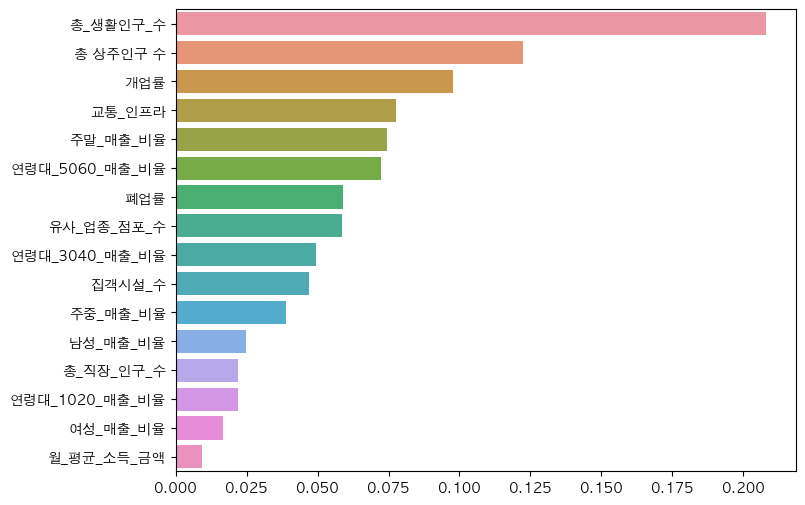

In [128]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x3_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [129]:
ftr_top

총_생활인구_수          0.208247
총 상주인구 수          0.122272
개업률               0.097698
교통_인프라            0.077684
주말_매출_비율          0.074325
연령대_5060_매출_비율    0.072190
폐업률               0.058880
유사_업종_점포_수        0.058699
연령대_3040_매출_비율    0.049541
집객시설_수            0.046946
주중_매출_비율          0.038842
남성_매출_비율          0.024597
총_직장_인구_수         0.022084
연령대_1020_매출_비율    0.022069
여성_매출_비율          0.016749
월_평균_소득_금액        0.009177
dtype: float64

##### 서비스업

In [130]:
x3 = cluster2_df[cluster2_df['업종_대분류'] == '서비스업'].drop(['경영_위기_비율', '업종_대분류'], axis=1)
y3 = cluster2_df[cluster2_df['업종_대분류'] == '서비스업']['경영_위기_비율']
x3_train, x3_valid, y3_train, y3_valid= train_test_split(x3, y3, test_size=0.2, random_state=0)

In [131]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4 ,6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10, 12),
    'min_samples_split' : (4, 6, 8, 10, 12)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_cv.fit(x3_train, y3_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
최적 MSE: 0.0052


In [132]:
rf = RandomForestRegressor(random_state=0, max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=100)
rf.fit(x3_train, y3_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=10,
                      random_state=0)

In [133]:
# train rmse
train_predict = rf.predict(x3_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y3_train))))

# valid rmse
valid_predict = rf.predict(x3_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y3_valid))))

RMSE:0.048767252490307236
RMSE:0.080245621940727


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


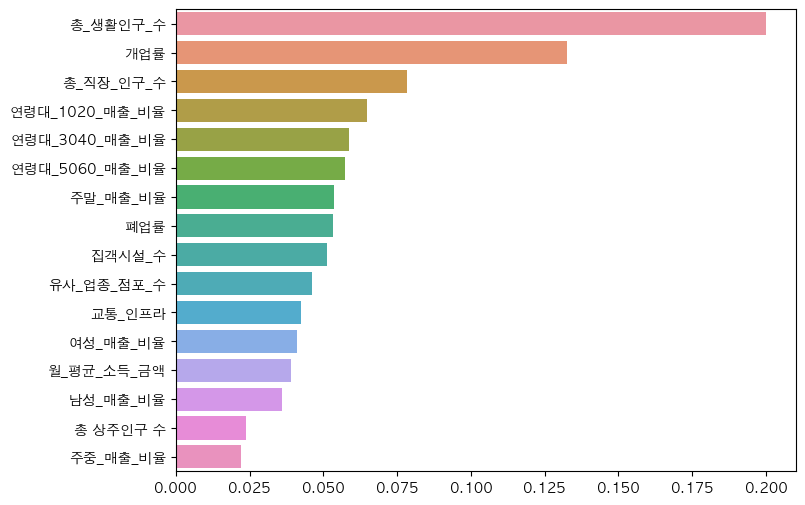

In [134]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x3_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [135]:
ftr_top

총_생활인구_수          0.200102
개업률               0.132441
총_직장_인구_수         0.078240
연령대_1020_매출_비율    0.064868
연령대_3040_매출_비율    0.058570
연령대_5060_매출_비율    0.057404
주말_매출_비율          0.053446
폐업률               0.053218
집객시설_수            0.051294
유사_업종_점포_수        0.046164
교통_인프라            0.042408
여성_매출_비율          0.041056
월_평균_소득_금액        0.039153
남성_매출_비율          0.035836
총 상주인구 수          0.023860
주중_매출_비율          0.021939
dtype: float64

##### 유통업 - 결과 X

In [161]:
x3 = cluster2_df[cluster2_df['업종_대분류'] == '유통업'].drop(['경영_위기_비율', '업종_대분류'], axis=1)
y3 = cluster2_df[cluster2_df['업종_대분류'] == '유통업']['경영_위기_비율']
x3_train, x3_valid, y3_train, y3_valid= train_test_split(x3, y3, test_size=0.2, random_state=0)

In [162]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4 ,6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10, 12),
    'min_samples_split' : (4, 6, 8, 10, 12)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_cv.fit(x3_train, y3_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 100}
최적 MSE: 0.0063


In [163]:
rf = RandomForestRegressor(random_state=0, max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=100)
rf.fit(x3_train, y3_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=4,
                      random_state=0)

In [164]:
# train rmse
train_predict = rf.predict(x3_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y3_train))))

# valid rmse
valid_predict = rf.predict(x3_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y3_valid))))

RMSE:0.07515174661470514
RMSE:0.05686938865367839


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/p-012/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


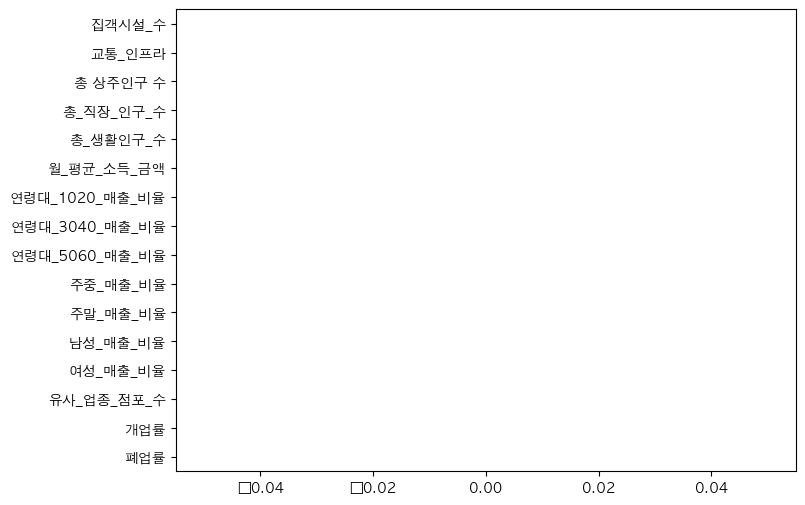

In [165]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x3_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [141]:
ftr_top

집객시설_수            0.0
교통_인프라            0.0
총 상주인구 수          0.0
총_직장_인구_수         0.0
총_생활인구_수          0.0
월_평균_소득_금액        0.0
연령대_1020_매출_비율    0.0
연령대_3040_매출_비율    0.0
연령대_5060_매출_비율    0.0
주중_매출_비율          0.0
주말_매출_비율          0.0
남성_매출_비율          0.0
여성_매출_비율          0.0
유사_업종_점포_수        0.0
개업률               0.0
폐업률               0.0
dtype: float64

### cluster 3

##### 외식업

In [142]:
x4 = cluster3_df[cluster3_df['업종_대분류'] == '외식업'].drop(['경영_위기_비율', '업종_대분류'], axis=1)
y4 = cluster3_df[cluster3_df['업종_대분류'] == '외식업']['경영_위기_비율']
x4_train, x4_valid, y4_train, y4_valid= train_test_split(x4, y4, test_size=0.2, random_state=0)

In [144]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4 ,6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10, 12),
    'min_samples_split' : (4, 6, 8, 10, 12)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_cv.fit(x4_train, y4_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 300}
최적 MSE: 0.0044


In [145]:
rf = RandomForestRegressor(random_state=0, max_depth=6, min_samples_leaf=4, min_samples_split=12, n_estimators=300)
rf.fit(x4_train, y4_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=12,
                      n_estimators=300, random_state=0)

In [146]:
# train rmse
train_predict = rf.predict(x4_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y4_train))))

# valid rmse
valid_predict = rf.predict(x4_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y4_valid))))

RMSE:0.044632358223201156
RMSE:0.08819579828152507


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


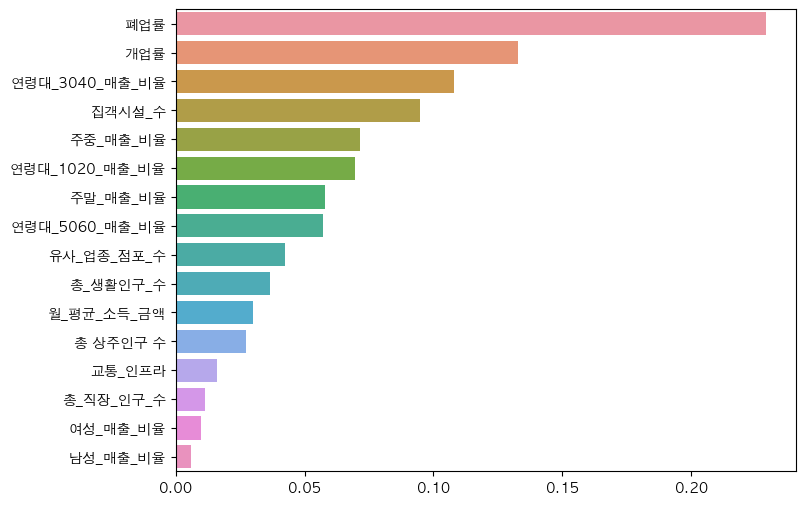

In [147]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x4_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [148]:
ftr_top

폐업률               0.229177
개업률               0.132879
연령대_3040_매출_비율    0.107825
집객시설_수            0.094899
주중_매출_비율          0.071325
연령대_1020_매출_비율    0.069704
주말_매출_비율          0.057818
연령대_5060_매출_비율    0.057194
유사_업종_점포_수        0.042300
총_생활인구_수          0.036464
월_평균_소득_금액        0.029922
총 상주인구 수          0.027358
교통_인프라            0.015961
총_직장_인구_수         0.011427
여성_매출_비율          0.009681
남성_매출_비율          0.006065
dtype: float64

In [67]:
corr_df = cluster3_df[cluster3_df['업종_대분류'] == '외식업'].drop('업종_대분류', axis=1).corrwith(cluster3_df['경영_위기_비율'])
sorted_corr = corr_df.sort_values(ascending=False)
sorted_corr

경영_위기_비율          1.000000
개업률               0.438965
폐업률               0.419481
연령대_3040_매출_비율    0.321621
주중_매출_비율          0.230873
남성_매출_비율          0.174456
총 상주인구 수          0.020958
교통_인프라           -0.064785
연령대_5060_매출_비율   -0.070550
총_직장_인구_수        -0.084745
월_평균_소득_금액       -0.124909
여성_매출_비율         -0.177373
연령대_1020_매출_비율   -0.201974
유사_업종_점포_수       -0.213633
주말_매출_비율         -0.233339
총_생활인구_수         -0.278346
집객시설_수           -0.337830
dtype: float64

##### 서비스업

In [149]:
x4 = cluster3_df[cluster3_df['업종_대분류'] == '서비스업'].drop(['경영_위기_비율', '업종_대분류'], axis=1)
y4 = cluster3_df[cluster3_df['업종_대분류'] == '서비스업']['경영_위기_비율']
x4_train, x4_valid, y4_train, y4_valid= train_test_split(x4, y4, test_size=0.2, random_state=0)

In [150]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4 ,6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10, 12),
    'min_samples_split' : (4, 6, 8, 10, 12)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_cv.fit(x4_train, y4_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 200}
최적 MSE: 0.0091


In [151]:
rf = RandomForestRegressor(random_state=0, max_depth=4, min_samples_leaf=6, min_samples_split=10, n_estimators=200)
rf.fit(x4_train, y4_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=10,
                      n_estimators=200, random_state=0)

In [152]:
# train rmse
train_predict = rf.predict(x4_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y4_train))))

# valid rmse
valid_predict = rf.predict(x4_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y4_valid))))

RMSE:0.067221108242008
RMSE:0.048814838409887054


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


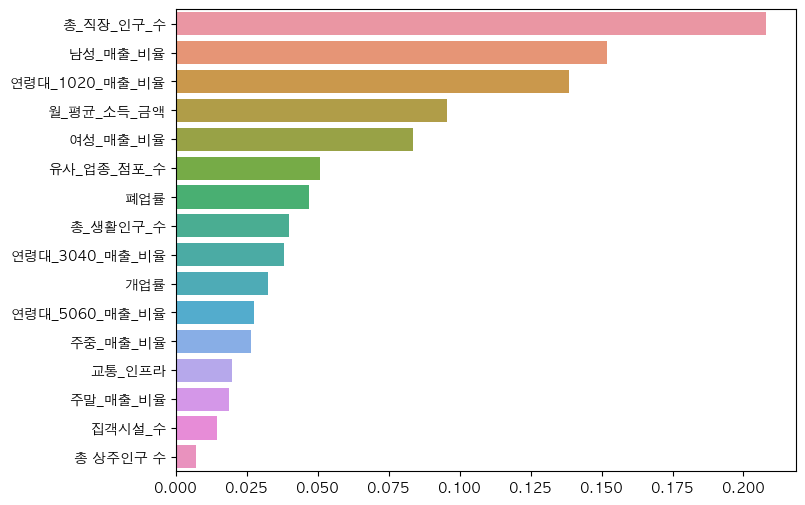

In [153]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x4_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [154]:
ftr_top

총_직장_인구_수         0.208059
남성_매출_비율          0.152000
연령대_1020_매출_비율    0.138458
월_평균_소득_금액        0.095471
여성_매출_비율          0.083482
유사_업종_점포_수        0.050892
폐업률               0.047064
총_생활인구_수          0.039900
연령대_3040_매출_비율    0.038117
개업률               0.032363
연령대_5060_매출_비율    0.027554
주중_매출_비율          0.026573
교통_인프라            0.019660
주말_매출_비율          0.018808
집객시설_수            0.014606
총 상주인구 수          0.006993
dtype: float64

In [66]:
corr_df = cluster3_df[cluster3_df['업종_대분류'] == '서비스업'].drop('업종_대분류', axis=1).corrwith(cluster3_df['경영_위기_비율'])
sorted_corr = corr_df.sort_values(ascending=False)
sorted_corr

경영_위기_비율          1.000000
연령대_1020_매출_비율    0.286621
여성_매출_비율          0.159495
개업률               0.056932
주말_매출_비율          0.021589
주중_매출_비율         -0.018656
폐업률              -0.069089
총_생활인구_수         -0.074547
연령대_5060_매출_비율   -0.109643
집객시설_수           -0.140012
교통_인프라           -0.152427
남성_매출_비율         -0.157960
연령대_3040_매출_비율   -0.162988
총 상주인구 수         -0.291467
유사_업종_점포_수       -0.294733
총_직장_인구_수        -0.322958
월_평균_소득_금액       -0.380421
dtype: float64

##### 유통업

In [155]:
x4 = cluster3_df[cluster3_df['업종_대분류'] == '유통업'].drop(['경영_위기_비율', '업종_대분류'], axis=1)
y4 = cluster3_df[cluster3_df['업종_대분류'] == '유통업']['경영_위기_비율']
x4_train, x4_valid, y4_train, y4_valid= train_test_split(x4, y4, test_size=0.2, random_state=0)

In [156]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4 ,6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10, 12),
    'min_samples_split' : (4, 6, 8, 10, 12)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_cv.fit(x4_train, y4_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 300}
최적 MSE: 0.0116


In [157]:
rf = RandomForestRegressor(random_state=0, max_depth=6, min_samples_leaf=4, min_samples_split=12, n_estimators=300)
rf.fit(x4_train, y4_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=12,
                      n_estimators=300, random_state=0)

In [158]:
# train rmse
train_predict = rf.predict(x4_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y4_train))))

# valid rmse
valid_predict = rf.predict(x4_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y4_valid))))

RMSE:0.07635295491132256
RMSE:0.11581907653557641


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


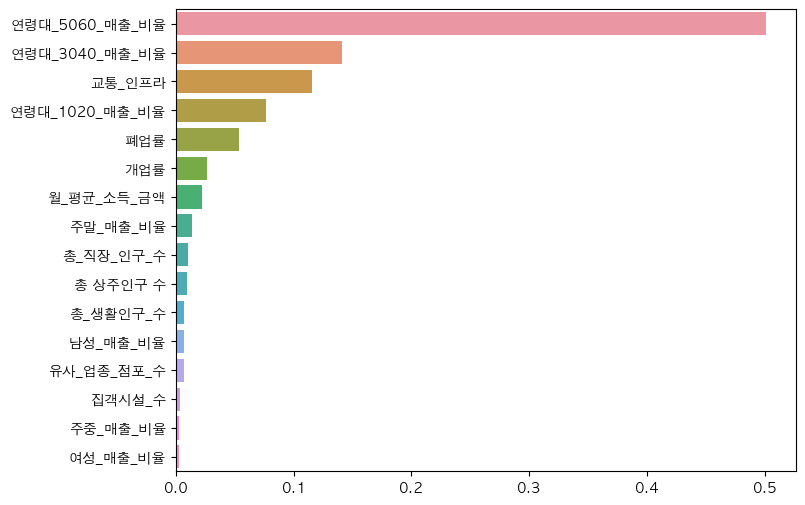

In [159]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x4_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [160]:
ftr_top

연령대_5060_매출_비율    0.501542
연령대_3040_매출_비율    0.141024
교통_인프라            0.115591
연령대_1020_매출_비율    0.076314
폐업률               0.053445
개업률               0.026667
월_평균_소득_금액        0.022584
주말_매출_비율          0.013815
총_직장_인구_수         0.010369
총 상주인구 수          0.009663
총_생활인구_수          0.006859
남성_매출_비율          0.006667
유사_업종_점포_수        0.006667
집객시설_수            0.003333
주중_매출_비율          0.002852
여성_매출_비율          0.002609
dtype: float64

In [59]:
corr_df = cluster3_df[cluster3_df['업종_대분류'] == '유통업'].drop('업종_대분류', axis=1).corrwith(cluster3_df['경영_위기_비율'])
sorted_corr = corr_df.sort_values(ascending=False)
sorted_corr

경영_위기_비율          1.000000
연령대_5060_매출_비율    0.274909
주중_매출_비율          0.256291
폐업률               0.216631
총_생활인구_수          0.161545
총 상주인구 수          0.103320
여성_매출_비율          0.079973
월_평균_소득_금액        0.036556
총_직장_인구_수         0.028502
집객시설_수           -0.002173
연령대_1020_매출_비율   -0.028513
유사_업종_점포_수       -0.076427
남성_매출_비율         -0.078451
교통_인프라           -0.169799
개업률              -0.188150
주말_매출_비율         -0.259934
연령대_3040_매출_비율   -0.287021
dtype: float64